In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from prophet import Prophet 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


mae: 11806.677087384023
RMSE: 12197.47855542206


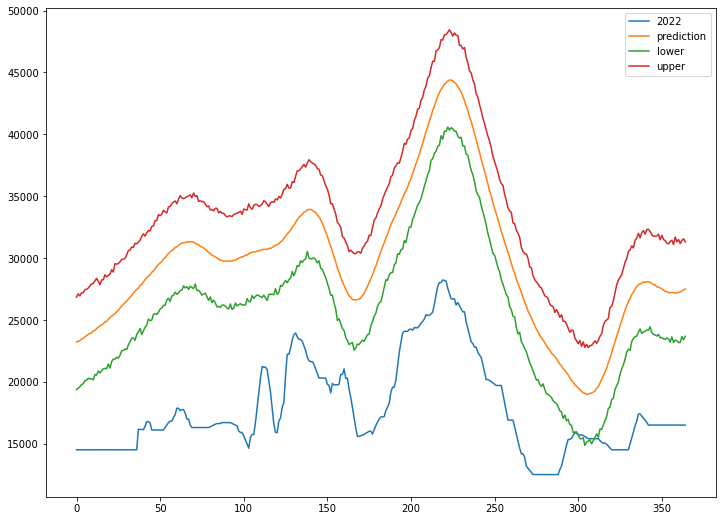

In [2]:
df = pd.read_csv('+22년se수박_het.csv',encoding='cp949')
df['ds'] = pd.to_datetime(df['ds'])

test_df = df[-365:]

df['cap'] = (df['y'].max()*2)
df['floor'] = (df['y'].min()/2)
model_het = Prophet(growth='logistic',
    n_changepoints=25,
    changepoint_prior_scale=0.043,
    seasonality_prior_scale=10,
    seasonality_mode='multiplicative',
    #seasonality_mode='additive',
    yearly_seasonality=True,
    daily_seasonality=True,
    #weekly_seasonality=True,
    )
model_het.fit(df)

future = model_het.make_future_dataframe(periods=365)
future['cap'] = (df['y'].max()*2)
future['floor'] = (df['y'].min()/2)

forecast = model_het.predict(future)
pred_het = forecast['yhat'].tail(365).reset_index(drop=True)
lower = forecast['yhat_lower'].tail(365).reset_index(drop=True)
upper = forecast['yhat_upper'].tail(365).reset_index(drop=True)


from sklearn.metrics import mean_absolute_error
print('mae:',mean_absolute_error(test_df['y'], pred_het))
print('RMSE:', mean_squared_error(test_df['y'], pred_het)**0.5)
#한개 단위 단가라서 한개 단위로 mae, RMSE 비교
# import joblib
# joblib.dump(model_het, 'model/se_수박_prophet1.pkl')

#test 값 비교 시각화
plt.figure(figsize=(12, 9))
plt.plot(df['y'].tail(365).reset_index(drop=True), label = '2022')
plt.plot(pred_het, label = 'prediction')
plt.plot(forecast['yhat_lower'].tail(365).reset_index(drop=True), label = 'lower')
plt.plot(forecast['yhat_upper'].tail(365).reset_index(drop=True), label = 'upper')
plt.legend()
plt.show()